# <center>L2 Computational Physics</center>
---

## Week 5: Monte Carlo Methods

In this notebook, you will simulate a system with of three nuclei $A$, $B$ and $C$ where $A$ decays into $B$ and $B$ decays into $C$. If exposed to a neutron flux nucleus $C$ can be activated into a nucleus $A$. 

In [1]:
import numpy
from matplotlib import pyplot as plt
import random

Implement a function that tells whether a transition has occured, based on the transition probability and a random number. Use the random number `r` from `random.random()` and use the procedure described in the notes so that the checks can work in a reproducible way.

In [15]:
def has_transitioned(prob):
    r = random.random()
    return r<prob



In [16]:
# this test is worth 1 mark
random.seed(9867)
assert [ has_transitioned(0.5) for i in range(10)] == [False, False, True, False, False, False, False, True, False, True]

We are going to keep track of the state of the atoms using a either `'A'`, `'B'` or `'C'` for each nucleus. For example 
```python
state = ['A', 'A', 'B', 'A', 'C']
```

We will capture the possible physical reaction in a list of allowed transitions such as

`('A', 'B', 0.25 )`

where the first element is the initial state, the second element is the final state of the transition and its probability in the time interval considered is the third argument.

Define a function that takes as arguments the current state and a list of such transition rules and implements the transition (or not) and returns the new state

In [17]:
def evolveOne(currentState, rules):
    for i in range(len(rules)):
        if currentState == rules[i][0]:
            transition = has_transitioned(rules[i][2])
            if transition == True:
                return rules[i][1]
    else:
        return currentState
    
        
        
        
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]

        
        
        

In [18]:
# these tests are worth 1 mark
alwaysDecayRules = [
    ('A', 'B', 1.0),
    ('B', 'C', 1.0)
]
assert evolveOne('A', alwaysDecayRules) == 'B'
assert evolveOne('B', alwaysDecayRules) == 'C'

In [19]:
# these tests are worth 2 mark
random.seed(112211)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'A'
assert evolveOne('A', testRules) == 'B'

assert evolveOne('B', testRules) == 'B'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'
assert evolveOne('B', testRules) == 'C'

# with no rules there should be no change
assert evolveOne('C', testRules) == 'C'


Now implement a function that takes a list of states and transition them according to the rules passed as argument. This function should return a new vector of states, it should not modify the state passed as an argument!

In [20]:
def evolveMany(states, rules):
    newState = []
    for i in range(len(states)): 
        transition_state = evolveOne(states[i], rules)
        newState.append(transition_state)
    return newState


In [21]:
# these tests are worth 1 mark
random.seed(112287)
testRules = [
    ('A', 'B', 0.33),
    ('B', 'C', 0.75)
]
initialTestArray = ['A','B','C']*5
evolvedTest = evolveMany(initialTestArray, testRules)
targetArray = ['B', 'C', 'C', 'A', 'C', 'C', 'A', 'B', 'C', 'A', 'C', 'C', 'B', 'C', 'C'] 
assert evolvedTest == targetArray
# checks the initial array is left unchanged
assert initialTestArray == ['A','B','C']*5

Define a function that evolves a system that starts with initial amounts `NA`, `NB` and `NC` of $A$, $B$ and $C$ nuclei and evolved it in `n_timestep` from time $t=0$ to $t=t_{max}$. The function should return three arrays, one for each atom type, of the number of nuclei of that type at each time step. Each array should contain `n_timestep+1` elements including the initial amount. 
 

In [22]:
def evolve_system(NA, NB, NC, rules, n_step):
    state = (['A'] * NA)+(['B'] * NB)+(['C'] * NC)

    A_count = numpy.empty(n_step + 1, dtype=int)
    B_count = numpy.empty(n_step + 1, dtype=int)
    C_count = numpy.empty(n_step + 1, dtype=int)
    
    A_count[0] = NA
    B_count[0] = NB
    C_count[0] = NC 
    
    for i in range(n_step):
        states_transition = evolveMany(state, rules)
        A_number = states_transition.count('A')
        A_count[i+1] = A_number
        B_number = states_transition.count('B')
        B_count[i+1] = B_number
        C_number = states_transition.count('C')
        C_count[i+1] = C_number
        state = states_transition
        i = i+1
        
 
    return A_count, B_count, C_count


In [23]:
# these tests are worth 2 marks
rules = [
    ('A', 'B', 0.0033),
    ('B', 'C', 0.0075),
    ('C', 'A', 0.009)
    
]

r1, r2, r3 = evolve_system(0,0,250, rules, 17)
assert len(r1) == 18
assert len(r2) == 18
assert len(r3) == 18

In [24]:
# these tests are worth 2 marks 
testrules = [
    ('A', 'B', 0.086),
    ('B', 'C', 0.075),
    ('C', 'A', 0.19)
    
]

random.seed(9485)
r1, r2, r3 = evolve_system(200,200,200, testrules, 20)
assert (r1 == [200, 213, 233, 250, 258, 251, 266, 263, 259, 260, 265, 259, 256,
        255, 258, 256, 259, 253, 249, 247, 253]).all()
assert (r2 == [200, 198, 201, 206, 205, 214, 214, 212, 216, 221, 225, 234, 236,
        238, 234, 235, 231, 245, 253, 256, 252]).all()
assert (r3 == [200, 189, 166, 144, 137, 135, 120, 125, 125, 119, 110, 107, 108,
        107, 108, 109, 110, 102,  98,  97,  95]).all()

## Plotting tasks

Create a plot with the number of $A$, $B$ and $C$ nuclei, starting with 250 $C$ nuclei and evolving the system for 100 hours using 200 steps and with neutron flux on. Evolve the system for another 100 hours (using 200 steps) without neutron flux (i.e. no transitions from $C$ to $A$).  

The half life of the $A$ atoms is 10.1 hours, the half life of $B$ nuclei is 15.7 hours and we can caracterise the rate of activation of $C$ into $A$ when the neutron flux is on with and effective half-life of 3.2 hours.

The plot should have the appropriate labels and legend. [8 marks]    




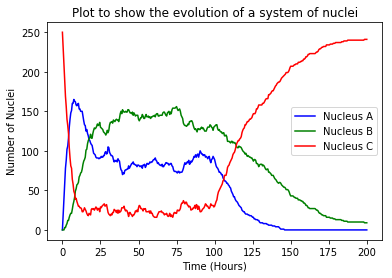

In [25]:
nsteps = 200
t_total = 100
t_half_A = 10.1
t_half_B = 15.7
t_half_C = 3.2

tau_A = (t_half_A)/(numpy.log(2))
tau_B = (t_half_B)/(numpy.log(2))
tau_C = (t_half_C)/(numpy.log(2))

prob_A = 1 - numpy.exp(-(0.5/tau_A))
prob_B = 1 - numpy.exp(-(0.5/tau_B))
prob_C = 1 - numpy.exp(-(0.5/tau_C))


initial_rules = [
    ('A', 'B', prob_A),
    ('B', 'C', prob_B),
    ('C', 'A', prob_C)
    
]

second_rules = rules = [
    ('A', 'B', prob_A),
    ('B', 'C', prob_B)
    
]

initial_A, initial_B, initial_C = evolve_system(0, 0, 250, initial_rules, nsteps)

calculate_A, calculate_B, calculate_C = evolve_system(initial_A[-1], initial_B[-1], initial_C[-1], second_rules, nsteps)

second_A = calculate_A[1:]
second_B = calculate_B[1:]
second_C = calculate_C[1:]


allresults_A = numpy.concatenate((initial_A, second_A))
allresults_B = numpy.concatenate((initial_B, second_B))
allresults_C = numpy.concatenate((initial_C, second_C))


xs = numpy.arange(401)/2

plt.ylabel('Number of Nuclei')
plt.xlabel('Time (Hours)')
plt.title('Plot to show the evolution of a system of nuclei')
plt.plot(xs, allresults_A, 'b-', label = 'Nucleus A')
plt.plot(xs, allresults_B, 'g-', label = 'Nucleus B')
plt.plot(xs, allresults_C, 'r-', label = 'Nucleus C')
plt.legend()




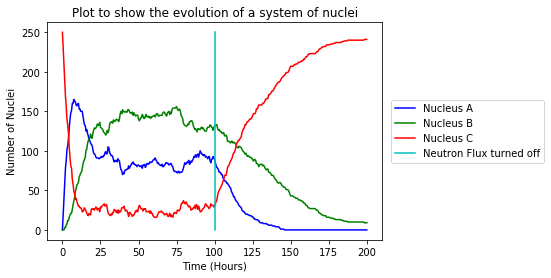

In [26]:
#This was just for practice
plt.ylabel('Number of Nuclei')
plt.xlabel('Time (Hours)')
plt.title('Plot to show the evolution of a system of nuclei')
plt.plot(xs, allresults_A, 'b-', label = 'Nucleus A')
plt.plot(xs, allresults_B, 'g-', label = 'Nucleus B')
plt.plot(xs, allresults_C, 'r-', label = 'Nucleus C')
plt.plot([100, 100], [0, 250], 'c-', label = 'Neutron Flux turned off')
plt.legend(loc = 'right', bbox_to_anchor=(1.5,0.5))

Run the above simulation 20 times with 200 steps and use the results to calculate an average and the uncertainty on the number of $A$ atoms as a function of time. Use and `errorbar` plot for it. You might be interested in the `numpy.average` and `numpy.std` functions. The plot should have axis labels and a title.  [3 marks]


<ErrorbarContainer object of 3 artists>

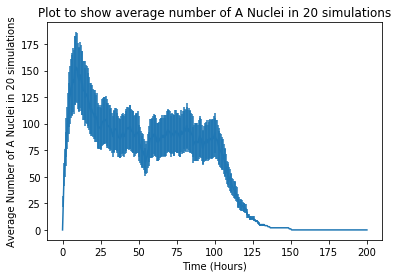

In [27]:
nsim = 20

A_values = [numpy.zeros(401) for y in range(nsim)]

for i in range(nsim):
    initial_A, initial_B, initial_C = evolve_system(0, 0, 250, initial_rules, 200)

    calculate_A, calculate_B, calculate_C = evolve_system(initial_A[-1], initial_B[-1], initial_C[-1], second_rules, 200)

    second_A = calculate_A[1:]

    allresults_A = numpy.concatenate((initial_A, second_A))
    
    A_values[i] = allresults_A 

average_A = numpy.empty(len(allresults_A), dtype=int)
error_A = numpy.empty(len(allresults_A), dtype=int)

for j in range(len(allresults_A)):
    for i in range(nsim):
        average_A[j] = numpy.average(A_values[i][j])
        error_array = numpy.zeros(nsim)
        error_array[i] = A_values[i][j]
        error_A[j] = numpy.std(error_array)

xs = numpy.arange(401)/2

plt.ylabel('Average Number of A Nuclei in 20 simulations')
plt.xlabel('Time (Hours)')
plt.title('Plot to show average number of A Nuclei in 20 simulations')
plt.errorbar(xs, average_A, yerr = error_A)


    
    
    
    